# Proyecto de Día 11 - Análisis Predictivo para una Tienda Minorista

### Objetivo
Tu tarea consiste en desarrollar un **modelo predictivo** para una **tienda minorista** que desea pronosticar las ventas basándose en diversas características. La tienda ha estado recopilando datos sobre las ventas diarias y quiere utilizar esta información para tomar decisiones informadas sobre la *gestión de inventario*, *promociones* y *programación de personal*.

Tu objetivo es construir un modelo que pueda **predecir el total de ventas para el próximo mes**, utilizando datos de los meses anteriores.

### Tarea
**1. Preparación de Datos**
- Carga el conjunto de datos y realiza cualquier preprocesamiento necesario, como manejar **valores faltantes**, selección de **variables dependientes e independientes**, y dividir los datos en **conjuntos de entrenamiento** y **prueba**.


**2. Análisis Exploratorio de Datos (EDA)**
- Realiza un EDA para entender la distribución de las ventas y la relación entre las ventas y otras características. Esto podría incluir trazar las ventas a lo largo del tiempo, analizar las ventas en *festivos* vs. *no festivos* y el impacto de las promociones.

**3. Selección de Modelo**
- Utiliza el conocimiento que has adquirido sobre diferentes algoritmos para elegir el modelo más adecuado para esta tarea. Considera la **Regresión Lineal**, los **Árboles de Decisión**, y los **Bosques Aleatorios**.

**4. Entrenamiento y Evaluación del Modelo**
- Entrena tu modelo seleccionado en el conjunto de entrenamiento y evalúa su rendimiento utilizando el conjunto de prueba. Utiliza gráficos para visualizar las *ventas reales* vs. *las predichas*.

**5. Conclusión**

- Basado en los resultados iniciales, resume tus hallazgos y realiza recomendaciones para la tienda minorista sobre cómo utilizar el análisis predictivo para una mejor toma de decisiones.


### Nota
* Enfócate en la claridad y simplicidad de tu código.

¡Mucha Suerte!

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
ruta = 'Ventas.csv'
df_ventas = pd.read_csv(ruta)
df_ventas

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484
...,...,...,...,...,...
360,2022-12-27,2,1,0,2189
361,2022-12-28,3,0,0,2548
362,2022-12-29,4,0,0,3018
363,2022-12-30,5,0,0,3591


In [4]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [5]:
df_ventas.describe()

,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365.000000,365.000000,365.000000,365.000000
mean,4.005479,0.200000,0.142466,2997.219178
std,2.002738,0.400549,0.350007,942.096284
min,1.000000,0.000000,0.000000,1305.000000
25%,2.000000,0.000000,0.000000,2195.000000
50%,4.000000,0.000000,0.000000,3074.000000
75%,6.000000,0.000000,0.000000,3979.000000
max,7.000000,1.000000,1.000000,4404.000000


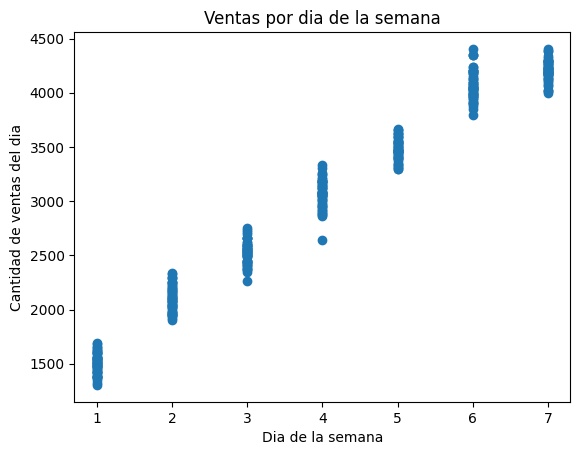

In [18]:
fig, ax = plt.subplots()
ax.scatter(df_ventas['DíaDeLaSemana'], df_ventas['Ventas'])
ax.set_title('Ventas por dia de la semana')
ax.set_xlabel('Dia de la semana')
ax.set_ylabel('Cantidad de ventas del dia');

In [28]:
dias_festivos = df_ventas.drop(['Promociones', 'Ventas'], axis=1)
dias_festivos

,Fecha,DíaDeLaSemana,Festivo
0,2022-01-01,6,0
1,2022-01-02,7,1
2,2022-01-03,1,0
3,2022-01-04,2,0
4,2022-01-05,3,0
...,...,...,...
360,2022-12-27,2,0
361,2022-12-28,3,0
362,2022-12-29,4,0
363,2022-12-30,5,0


In [29]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(dias_festivos, df_ventas['Ventas'], train_size=0.9, random_state=42)

In [22]:
modelo = LogisticRegression()

In [23]:
modelo.fit(X_entrena, y_entrena)

c:\Dev\Curso_data_y_machine\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
modelo.score(X_prueba, y_prueba)

0.8918918918918919